In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from dateutil.relativedelta import relativedelta

plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
input_file = 'D://Repositories/covid-19-data/public/data/owid-covid-data.csv'

n = 11
group_one = ['USA', 'IND', 'GBR']
fig_size = (12, 4)

today = datetime.today().strftime('%Y-%m-%d')
two_days = (datetime.today()-relativedelta(days=2)).strftime('%Y-%m-%d')
one_day = (datetime.today()-relativedelta(days=1)).strftime('%Y-%m-%d')
last_day = two_days

In [3]:
inp = pd.read_csv(input_file)
inp['daily_tests'] = inp['new_tests'].rolling(7).mean()
inp['daily_cases'] = inp['new_cases'].rolling(7).mean()
inp['daily_deaths'] = inp['new_deaths'].rolling(7).mean()
inp['daily_hosp'] = inp['hosp_patients'].rolling(7).mean()
inp['daily_vacc'] = inp['new_vaccinations'].rolling(7).mean()
inp['daily_deaths_change_1w'] = inp['daily_deaths'].pct_change(periods=6)*100
inp['daily_cases_change_1w'] = inp['daily_cases'].pct_change(periods=6)*100
inp['daily_hosp_change_1w'] = inp['daily_hosp'].pct_change(periods=6)*100
inp['daily_vacc_change_1w'] = inp['daily_vacc'].rolling(7).mean()

inp['cfr'] = (100*inp['total_deaths'].rolling(7).sum()/inp['total_cases'].rolling(7).sum()).round(2)
inp['cfr_current'] = (100*inp['daily_deaths'].rolling(7).sum()/inp['daily_cases'].rolling(7).sum()).round(2)
inp['ptr'] = (100*inp['total_cases'].rolling(7).sum()/inp['total_tests'].rolling(7).sum()).round(2)
inp['ptr_current'] = (100*inp['daily_cases'].rolling(7).sum()/inp['daily_tests'].rolling(7).sum()).round(2)
inp['date'] = pd.to_datetime(inp['date'])
# inp.fillna(method='pad', inplace=True)

print(inp.columns)
# inp[inp['iso_code'].isin(['OWID_WRL']+group_one)].groupby('iso_code').tail(3)[[
#     'iso_code', 'date', 'total_cases', 'total_deaths', 'total_vaccinations', 'total_vaccinations_per_hundred',
#     'daily_cases', 'daily_deaths', 'daily_hosp', 'daily_vacc',
#     'daily_deaths_change_1w', 'daily_cases_change_1w', 'daily_hosp_change_1w', 'daily_vacc_change_1w',
#     'cfr', 'cfr_current', 'ptr', 'ptr_current']]

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_mil

In [4]:
top_n = inp[inp['date'] == last_day].sort_values('total_cases', ascending=False).head(n)['iso_code'].tolist()
top_fifty = inp[inp['date'] == last_day].sort_values('total_cases', ascending=False).head(50)['iso_code'].tolist()

In [5]:
df = inp[(inp['iso_code'].isin(top_n)) & (inp['date'] == last_day)][[
    'date', 'iso_code', 'population', 'total_cases', 'total_deaths', 'total_vaccinations', 'total_vaccinations_per_hundred',
    'cfr', 'daily_cases_change_1w', 'daily_deaths_change_1w']]

df['cases_%_world'] = (df['total_cases']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_cases'])
df['deaths_%_world'] = (df['total_deaths']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_deaths'])
df['cases_1M_pop'] = ((df['total_cases']*1000000)/(df['population'])).astype(int)
df['deaths_1M_pop'] = ((df['total_deaths']*1000000)/(df['population'])).astype(int)

df.sort_values('cases_%_world', ascending=False).set_index('iso_code')

,date,population,total_cases,total_deaths,total_vaccinations,total_vaccinations_per_hundred,cfr,daily_cases_change_1w,daily_deaths_change_1w,cases_%_world,deaths_%_world,cases_1M_pop,deaths_1M_pop
iso_code,,,,,,,,,,,,,
OWID_WRL,2021-01-18,7.794799e+09,95559647.0,2040107.0,41792710.0,0.54,2.14,-9.285860,1.733473,100.000000,100.000000,12259,261
USA,2021-01-18,3.310026e+08,24078772.0,399003.0,NaN,NaN,1.66,-16.316443,-3.203759,25.197636,19.557945,72744,1205
IND,2021-01-18,1.380004e+09,10581823.0,152556.0,381305.0,0.03,1.44,-14.616312,-13.144876,11.073527,7.477843,7667,110
BRA,2021-01-18,2.125594e+08,8511770.0,210299.0,1109.0,0.00,2.48,-1.318409,-3.434895,8.907285,10.308234,40044,989
RUS,2021-01-18,1.459345e+08,3552888.0,65059.0,NaN,NaN,1.82,0.914168,14.615865,3.717979,3.188999,24345,445
GBR,2021-01-18,6.788600e+07,3443350.0,90031.0,4723443.0,6.96,2.63,-19.170110,14.767139,3.603352,4.413053,50722,1326
FRA,2021-01-18,6.527351e+07,2972889.0,70826.0,479873.0,0.74,2.39,1.370220,4.242665,3.111030,3.471681,45545,1085
TUR,2021-01-18,8.433907e+07,2392963.0,24161.0,832412.0,0.99,1.00,-25.854510,-7.305577,2.504156,1.184301,28373,286
ITA,2021-01-18,6.046183e+07,2390102.0,82554.0,1194544.0,1.98,3.46,-16.904245,-3.982808,2.501162,4.046552,39530,1365


<AxesSubplot:title={'center':'Vaccinations'}, xlabel='iso_code'>

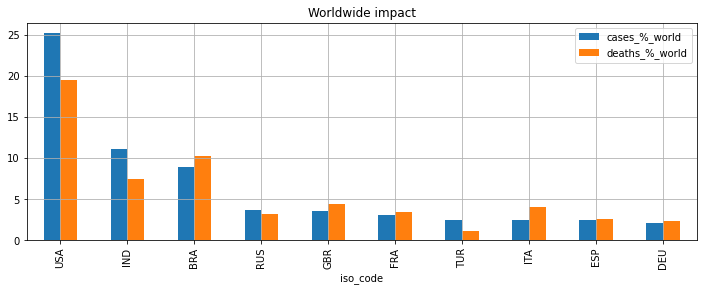

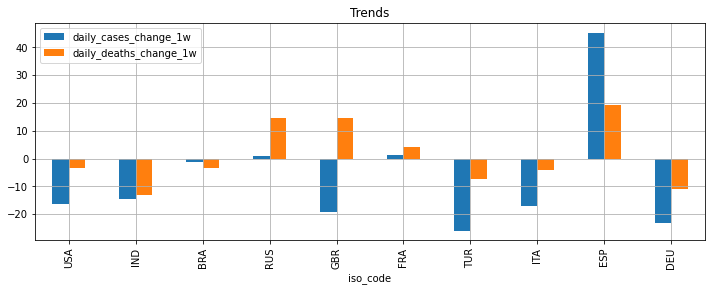

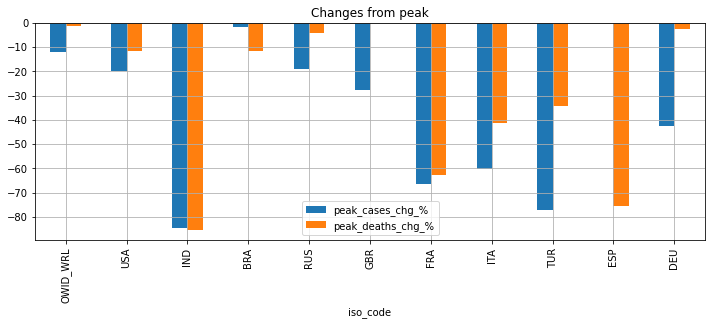

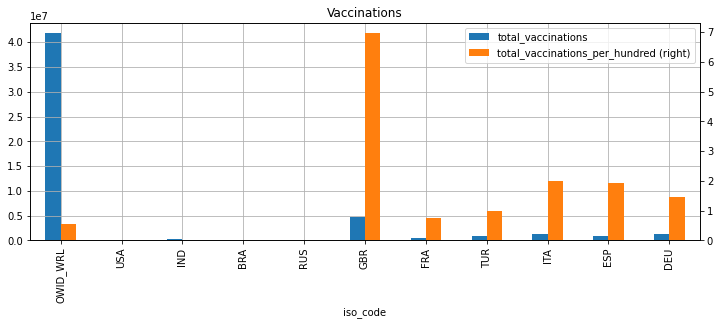

In [6]:
df[df['iso_code'] != 'OWID_WRL'].sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['cases_%_world', 'deaths_%_world'],
    kind='bar', figsize=fig_size, grid=True, title='Worldwide impact')

df[df['iso_code'] != 'OWID_WRL'].sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['daily_cases_change_1w', 'daily_deaths_change_1w'],
    kind='bar', figsize=fig_size, grid=True, title='Trends')

df_max = inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code')[['daily_cases', 'daily_deaths']].max()
df_last = inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code')[['iso_code', 'daily_cases', 'daily_deaths']].tail(1).set_index('iso_code')
df_pct_chg_max = ((df_last-df_max)*100/df_max)
df_pct_chg_max['total_cases'] = inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code').tail(1).set_index('iso_code')['total_cases']
df_pct_chg_max = df_pct_chg_max.rename(columns={'daily_cases': 'peak_cases_chg_%','daily_deaths': 'peak_deaths_chg_%'})

df_pct_chg_max.sort_values(by='total_cases', ascending=False).head(n).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='Changes from peak')

df.sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['total_vaccinations', 'total_vaccinations_per_hundred'], secondary_y=['total_vaccinations_per_hundred'],
    kind='bar', figsize=fig_size, grid=True, title='Vaccinations')

<AxesSubplot:title={'center':'Top total vaccs'}, xlabel='iso_code'>

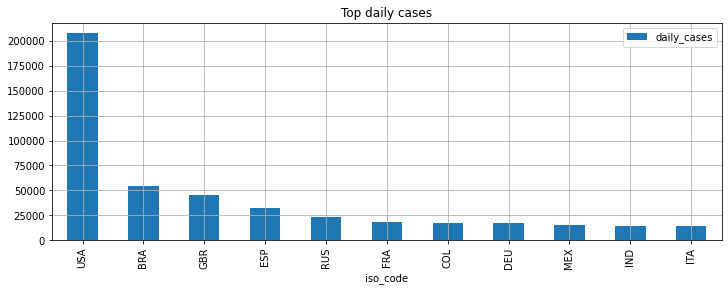

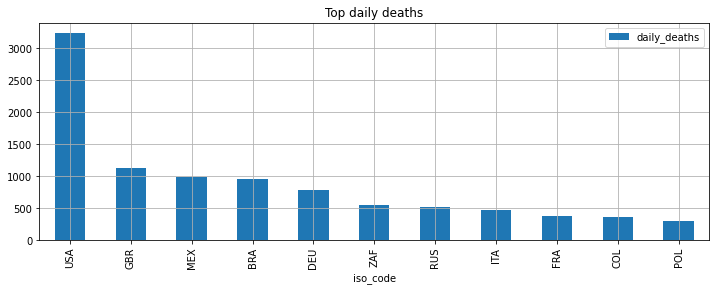

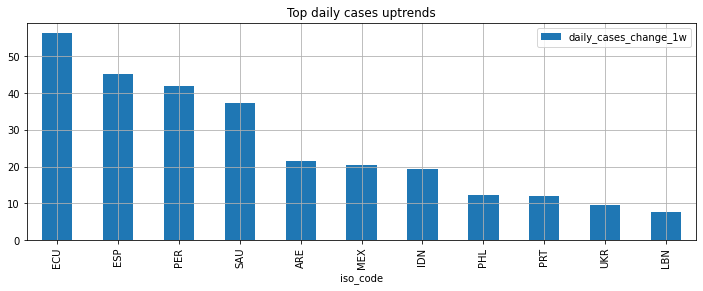

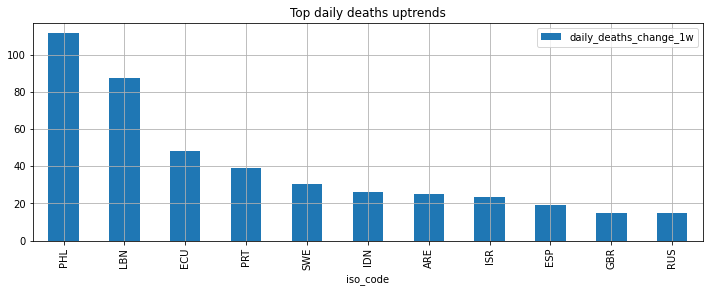

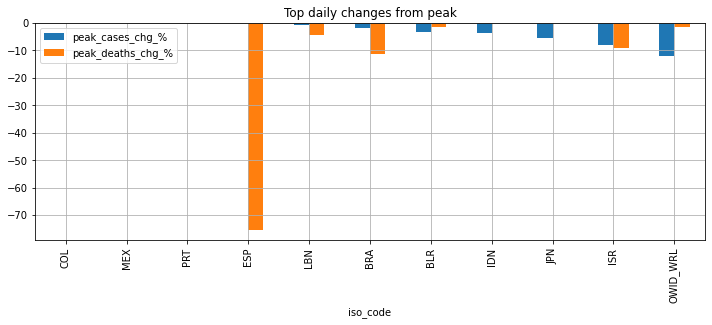

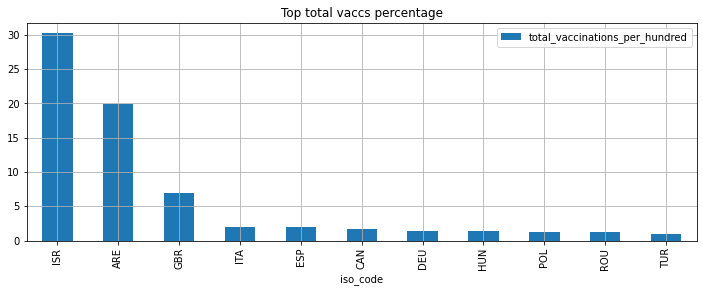

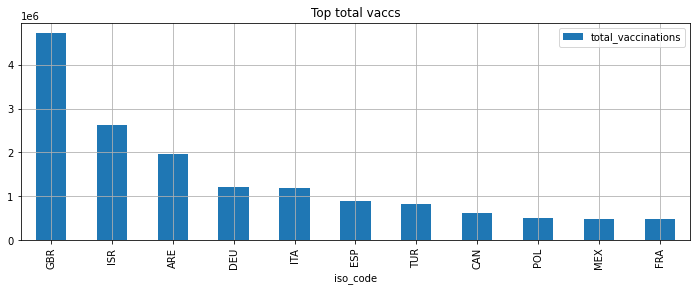

In [7]:
inp[(inp['iso_code'].isin(top_fifty)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='daily_cases', ascending=False).head(n).plot(
    x='iso_code', y=['daily_cases'], kind='bar',
    figsize=fig_size, grid=True, title='Top daily cases')

inp[(inp['iso_code'].isin(top_fifty)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='daily_deaths', ascending=False).head(n).plot(
    x='iso_code', y=['daily_deaths'], kind='bar',
    figsize=fig_size, grid=True, title='Top daily deaths')

inp[(inp['iso_code'].isin(top_fifty)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='daily_cases_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['daily_cases_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top daily cases uptrends')

inp[(inp['iso_code'].isin(top_fifty)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='daily_deaths_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['daily_deaths_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top daily deaths uptrends')

df_pct_chg_max.sort_values(by=['peak_cases_chg_%', 'peak_deaths_chg_%', 'total_cases'], ascending=[False, False, False]).head(n).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='Top daily changes from peak')

inp[(inp['iso_code'].isin(top_fifty)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='total_vaccinations_per_hundred', ascending=False).head(n).plot(
    x='iso_code', y=['total_vaccinations_per_hundred'], kind='bar',
    figsize=fig_size, grid=True, title='Top total vaccs percentage')

inp[(inp['iso_code'].isin(top_fifty)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='total_vaccinations', ascending=False).head(n).plot(
    x='iso_code', y=['total_vaccinations'], kind='bar',
    figsize=fig_size, grid=True, title='Top total vaccs')

In [8]:
def plot_weekly_avg(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')][[
        'date', 'daily_cases', 'daily_deaths', 'daily_hosp', 'daily_vacc']].plot(
        x='date', y=['daily_cases', 'daily_deaths', 'daily_hosp', 'daily_vacc'],
        secondary_y=['daily_deaths'],
        style = ['-', '-', '--', '--'], figsize=fig_size, grid=True, title=country)
    
def plot_cfr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')].plot(
        x='date', y='cfr', style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_ptr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')].plot(
        x='date', y='ptr',
        style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_totals(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')][[
        'date', 'total_cases', 'total_deaths', 'total_vaccinations']].plot(
        x='date', y=['total_cases', 'total_deaths', 'total_vaccinations'], secondary_y=['total_deaths'],
        style = ['-', '-', '--'], figsize=fig_size, grid=True, title=country)

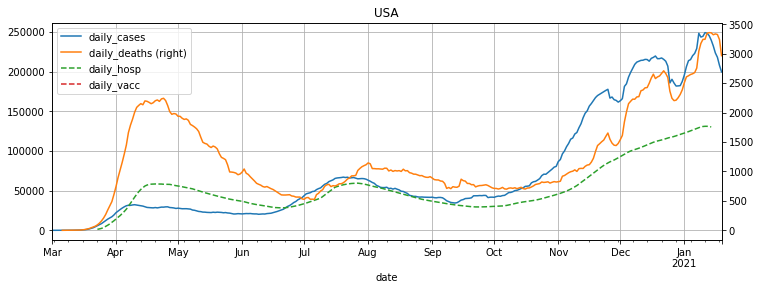

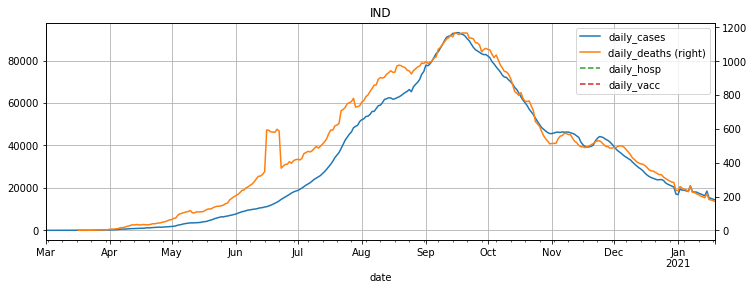

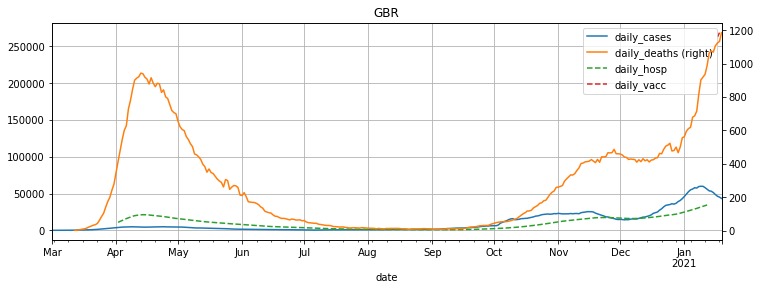

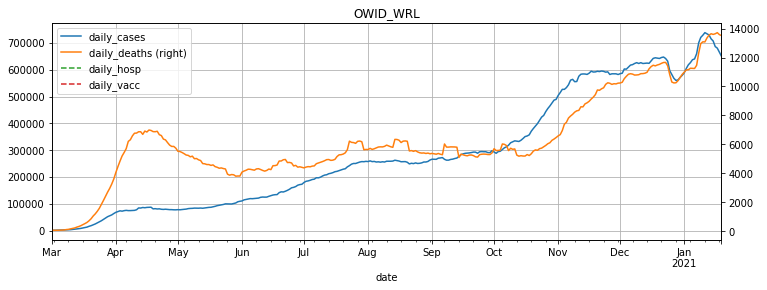

In [9]:
for country in group_one+['OWID_WRL']:
    plot_weekly_avg(inp, iso_code=country)

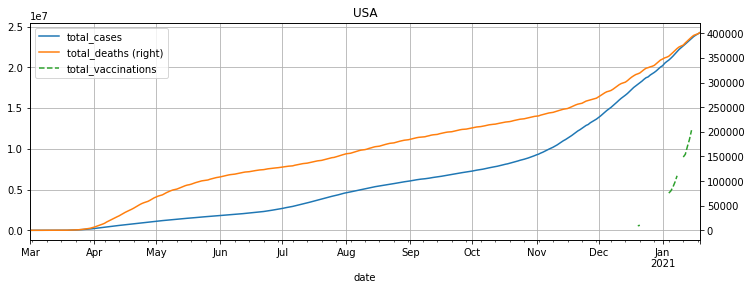

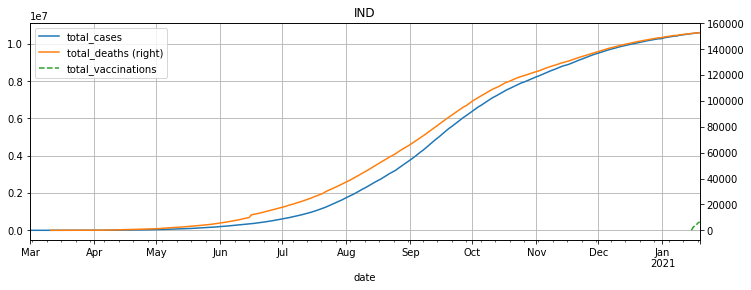

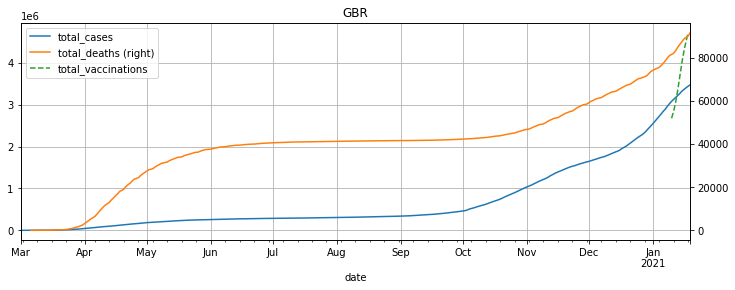

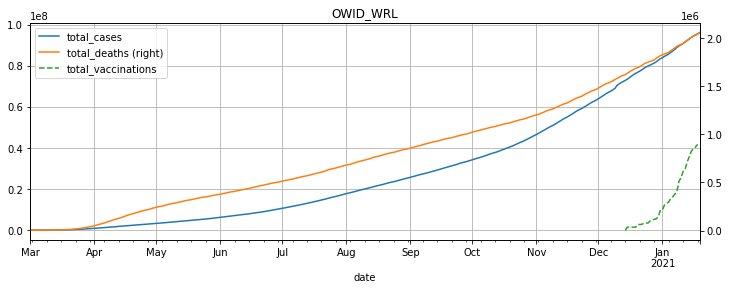

In [10]:
for country in group_one+['OWID_WRL']:
    plot_totals(inp, iso_code=country)

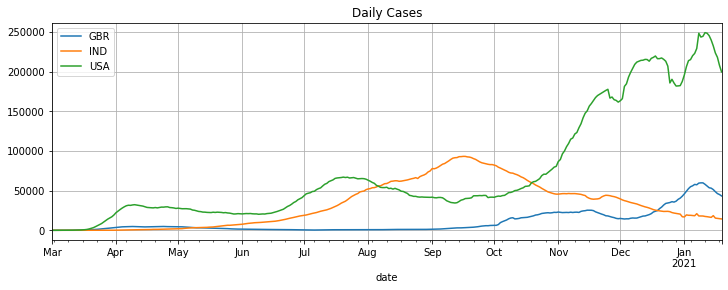

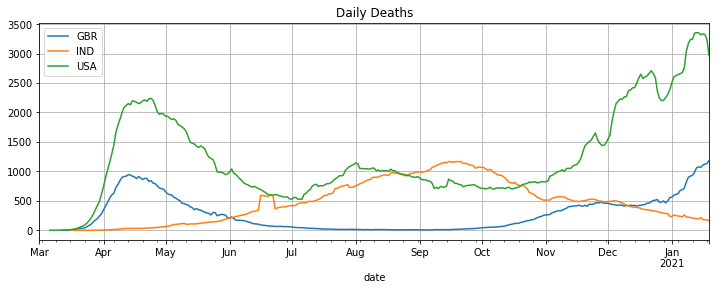

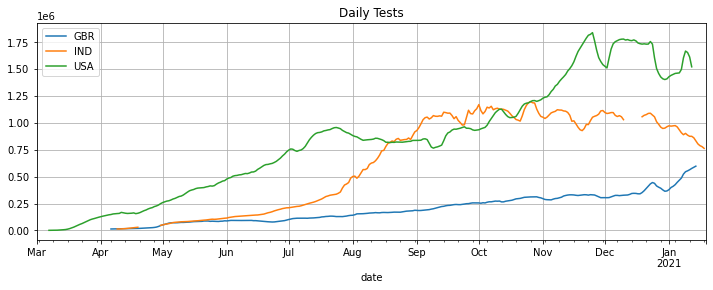

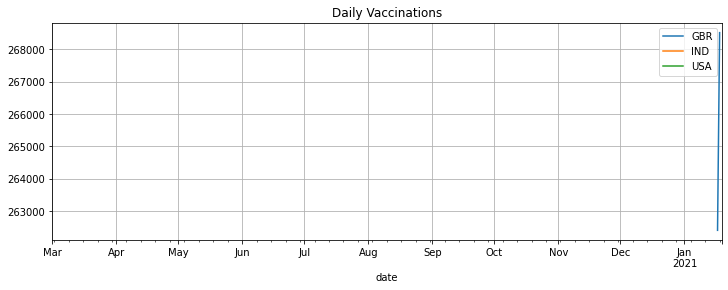

In [11]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_cases'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Cases')
axes.legend(list(reversed(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_deaths'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Deaths')
axes.legend(list(reversed(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_tests'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Tests')
axes.legend(list(reversed(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_vacc'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Vaccinations')
axes.legend(list(reversed(group_one)))

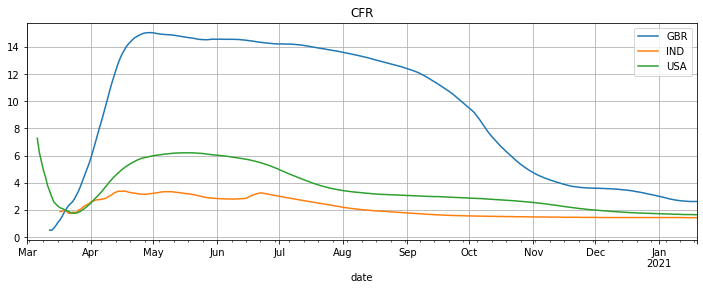

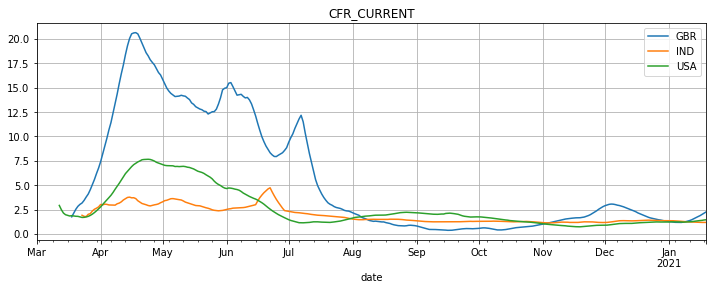

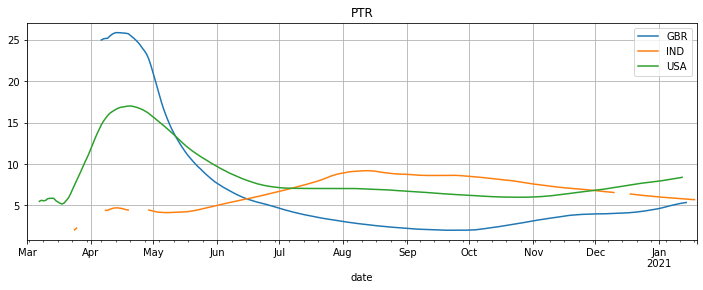

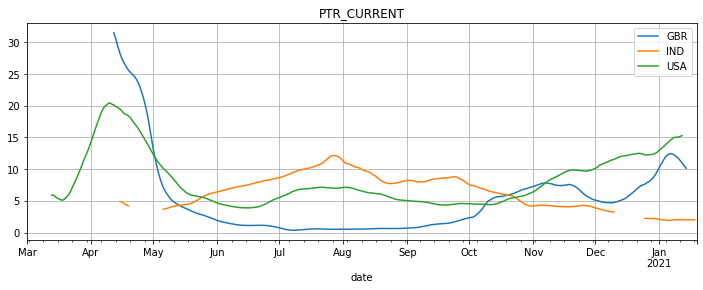

In [12]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['cfr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR')
axes.legend(list(reversed(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['cfr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR_CURRENT')
axes.legend(list(reversed(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['ptr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR')
axes.legend(list(reversed(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['ptr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR_CURRENT')
axes.legend(list(reversed(group_one)))